# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.describe()
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-La tabla o dataset correspondiente a las informacion de las tarifas contiene 8 columnas todas requeridas (non-null).
-Las informacion parace consistente con respecto a los planes con su determinda tipo de datos int, float y object cuando corresponde.


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
print(df_plans.isna().sum())
print(df_plans.duplicated().sum())


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
0


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

-Se tiene que considerar que al momento de hacer los calculos para el ingreso mensual se tiene convertir de MB a GB para su redondodeo, los segundos a minutos ya que la compañia Magaline trabaja de esta manera

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(10))



     user_id first_name   last_name  age  \
163     1163      Lanie  Washington   27   
474     1474     Randee   Carpenter   26   
22      1022         Bo        Snow   73   
227     1227     Vanesa      Willis   29   
381     1381     German      Burris   44   
326     1326  Johnathon      Branch   21   
55      1055    Patrick      Mclean   52   
443     1443     Genaro       Quinn   58   
478     1478      Elane       David   51   
475     1475      Arlen      Sutton   66   

                                          city    reg_date      plan  \
163     Los Angeles-Long Beach-Anaheim, CA MSA  2018-01-12  ultimate   
474                        Bakersfield, CA MSA  2018-08-26      surf   
22   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-04-20      surf   
227        Dallas-Fort Worth-Arlington, TX MSA  2018-01-17      surf   
381       Austin-Round Rock-Georgetown, TX MSA  2018-08-30      surf   
326              Greensboro-High Point, NC MSA  2018-02-06      surf   
55     Port

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-El dataframe df_users cuenta con 500 registros

-Tiene 8 columnas y todas son non-null es decir que son requeridas

-La mayoria de las columnas tiene el tipo de datos correcto las que pueden tener un cambio son reg_date y talvez churn_date

-Churn_date cuenta con 34 registros esto se debe a que los registros que estan nulos son las personas que todavia cuentan con un plan

-Tanto el nombre y el apellido se podria combertir a todo mayusculos o minuculas para tener una comparacion de duplicados posteriormiente

-Los nombres de las ciudades tiene como separador un guion y otros un espacio 

-La columna city cuenta con el nombre de la ciudad y el estado esto podria separar para que cada columna solo contenga informacion con respecto a su descripcion(nombre de columna)

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
df_users['first_name'] = df_users['first_name'].str.upper()
df_users['last_name'] = df_users['last_name'].str.upper()
df_users['city'] = df_users['city'].str.replace('-', ' ')
df_users['city'] = df_users['city'].str.replace(', ', ',')
df_users['city'] = df_users['city'].str.upper()
df_users['user_id'] = df_users['user_id'].astype(str)
print(df_users.head())

print(df_users.isna().sum())
print(df_users.duplicated().sum())

  user_id first_name  last_name  age                                  city  \
0    1000   ANAMARIA      BAUER   45  ATLANTA SANDY SPRINGS ROSWELL,GA MSA   
1    1001     MICKEY  WILKERSON   28        SEATTLE TACOMA BELLEVUE,WA MSA   
2    1002     CARLEE    HOFFMAN   36   LAS VEGAS HENDERSON PARADISE,NV MSA   
3    1003   REYNALDO    JENKINS   52                          TULSA,OK MSA   
4    1004    LEONILA   THOMPSON   40        SEATTLE TACOMA BELLEVUE,WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
df_users[['city','state']] = df_users['city'].str.split(',', expand=True)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format="%Y-%m-%d")
print(df_users.head())
df_users.info()


  user_id first_name  last_name  age                           city  \
0    1000   ANAMARIA      BAUER   45  ATLANTA SANDY SPRINGS ROSWELL   
1    1001     MICKEY  WILKERSON   28        SEATTLE TACOMA BELLEVUE   
2    1002     CARLEE    HOFFMAN   36   LAS VEGAS HENDERSON PARADISE   
3    1003   REYNALDO    JENKINS   52                          TULSA   
4    1004    LEONILA   THOMPSON   40        SEATTLE TACOMA BELLEVUE   

    reg_date      plan churn_date   state  
0 2018-12-24  ultimate        NaN  GA MSA  
1 2018-08-13      surf        NaN  WA MSA  
2 2018-10-21      surf        NaN  NV MSA  
3 2018-01-28      surf        NaN  OK MSA  
4 2018-05-23      surf        NaN  WA MSA  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_nam

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas

print(df_calls.sample(10))

print(df_calls[df_calls['duration']==0.00])


              id user_id  call_date  duration
27971   1106_294    1106 2018-06-20     21.01
84469   1311_293    1311 2018-07-06      3.92
130975  1470_424    1470 2018-08-22      0.73
66348   1240_206    1240 2018-11-17     17.09
50660     1183_4    1183 2018-12-19      5.59
93438   1334_806    1334 2018-04-09     11.21
70196   1251_207    1251 2018-07-17     14.88
54366   1196_249    1196 2018-10-16      0.29
119950  1417_722    1417 2018-09-06     11.88
2360    1009_782    1009 2018-12-09      7.83
              id user_id  call_date  duration
19        1001_4    1001 2018-12-05       0.0
25       1001_13    1001 2018-12-24       0.0
31       1001_30    1001 2018-10-17       0.0
32       1001_31    1001 2018-11-03       0.0
34       1001_35    1001 2018-12-21       0.0
...          ...     ...        ...       ...
137714  1499_183    1499 2018-11-10       0.0
137715  1499_184    1499 2018-09-15       0.0
137720  1499_189    1499 2018-12-27       0.0
137722  1499_191    1499 2018-12-2

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-El dataframe cuenta con 137735 registros y por lo que se observa no cuenta con ningun dato ausente

-Cuenta con 4 columnas non-null

-La columna user_id tiene un tipo de dato int lo cual no es necesario ya que no se realizar ningun calculo ademas de sumar usuarios si es que se requiere

-La columna call_date esta como un tipo de dato object el cual se puede cambiar a datetime si se quiere realizar algunos analisis con esto

-Hay registros con duracion 0 lo que puede indicar error en los regitros, una llamada fallida o una llamada que colgo inmediatamente al momento de llamar dejando ese registro pero ya que se registro como una llamada este valor se redondiara a 1

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
print(df_calls.isna().sum())
print(df_calls.duplicated().sum())



id           0
user_id      0
call_date    0
duration     0
dtype: int64
0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d")
df_calls['user_id'] = df_calls['user_id'].astype(str)
df_calls.info()
df_calls['duration'] = df_calls['duration'].replace(0, 1)
df_calls['duration'] = df_calls['duration'].apply(mt.ceil)
print(df_calls.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB
         id user_id  call_date  duration
0   1000_93    1000 2018-12-27         9
1  1000_145    1000 2018-12-27        14
2  1000_247    1000 2018-12-27        15
3  1000_309    1000 2018-12-28         6
4  1000_380    1000 2018-12-30         5


## Mensajes

In [20]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Imprime una muestra de datos para los mensajes

print(df_messages.sample(10))



              id  user_id message_date
48325  1324_1059     1324   2018-08-30
36908    1247_72     1247   2018-10-03
51577   1335_167     1335   2018-12-27
72357    1469_15     1469   2018-12-28
49145   1328_103     1328   2018-09-26
47116   1320_360     1320   2018-11-11
45178    1303_97     1303   2018-12-23
62793    1396_77     1396   2018-11-12
10691  1076_1565     1076   2018-12-12
34509    1220_10     1220   2018-08-29


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-El dataframe cuenta con 76051 y por lo obsevado no tiene registros nulos

-Cuenta con 3 columnas

-La columna message_date es tipo object la cual se puede cambiar a datetime para realizar un analisis si es requerido

-La columna user_id es tipo int lo cual no es necesario por que requerie realizar calculos complejos a excepcion de sumar cierta cantidad usuarios(sumar la cantida no el valor que representa la id)

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
print(df_messages.isna().sum())
print(df_messages.duplicated().sum())

id              0
user_id         0
message_date    0
dtype: int64
0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y-%m-%d")
df_messages['user_id'] = df_messages['user_id'].astype(str)

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(10))


             id  user_id session_date  mb_used
85314   1398_64     1398   2018-11-29    66.08
38721  1173_291     1173   2018-11-16   295.16
14699    1067_1     1067   2018-10-19   262.64
46271   1205_86     1205   2018-11-30   262.16
32978  1148_130     1148   2018-11-25    64.94
20571  1095_247     1095   2018-11-13   185.18
82333   1385_84     1385   2018-07-02  1168.38
93585  1436_367     1436   2018-08-27   435.77
25963   1121_56     1121   2018-12-15   215.76
45319  1201_181     1201   2018-11-23   597.75


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-El dataframe cuenta 104825 y por lo observado no cuenta con registros nulos

-Cuenta con 4 columnas

-La columna user_id tiene un tipo de dato int lo cual se puede combertir a object mejor ya que se realizan calculos complejos con este

-La columna session_date tiene un tipo de formato object pero se puede cambiar a datetime para realizar alguna analisis posteriormente

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [26]:
print(df_internet.isna().sum())
print(df_internet.duplicated().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [27]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y-%m-%d")
df_internet['user_id'] = df_internet['user_id'].astype(str)

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

df_calls['mes'] = df_calls['call_date'].dt.month
df_cal_llamadas = df_calls.groupby(['user_id','mes'])['mes'].count().reset_index(name='num_call')
print(df_cal_llamadas)
print(df_cal_llamadas['mes'].value_counts())



     user_id  mes  num_call
0       1000   12        16
1       1001    8        27
2       1001    9        49
3       1001   10        65
4       1001   11        64
...      ...  ...       ...
2253    1498   12        39
2254    1499    9        41
2255    1499   10        53
2256    1499   11        45
2257    1499   12        65

[2258 rows x 3 columns]
12    460
11    403
10    337
9     277
8     230
7     179
6     141
5     104
4      71
3      35
2      15
1       6
Name: mes, dtype: int64


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

df_minutos = df_calls.groupby(['user_id','mes'])['duration'].sum().reset_index(name='total_dura')
print(df_minutos)

     user_id  mes  total_dura
0       1000   12         124
1       1001    8         187
2       1001    9         326
3       1001   10         411
4       1001   11         441
...      ...  ...         ...
2253    1498   12         346
2254    1499    9         352
2255    1499   10         397
2256    1499   11         314
2257    1499   12         505

[2258 rows x 3 columns]


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages['mes'] = df_messages['message_date'].dt.month

df_cal_mensajes = df_messages.groupby(['user_id','mes'])['mes'].count().reset_index(name='cant_messa')
print(df_cal_mensajes)
print(df_messages[df_messages['user_id']=='1000'])

     user_id  mes  cant_messa
0       1000   12          11
1       1001    8          30
2       1001    9          44
3       1001   10          53
4       1001   11          36
...      ...  ...         ...
1801    1496    9          21
1802    1496   10          18
1803    1496   11          13
1804    1496   12          11
1805    1497   12          50

[1806 rows x 3 columns]
          id user_id message_date  mes
0   1000_125    1000   2018-12-27   12
1   1000_160    1000   2018-12-31   12
2   1000_223    1000   2018-12-31   12
3   1000_251    1000   2018-12-27   12
4   1000_255    1000   2018-12-26   12
5   1000_346    1000   2018-12-29   12
6   1000_386    1000   2018-12-30   12
7   1000_413    1000   2018-12-31   12
8   1000_502    1000   2018-12-27   12
9   1000_525    1000   2018-12-28   12
10  1000_567    1000   2018-12-25   12


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet['mes'] = df_internet['session_date'].dt.month

df_cal_trafico = df_internet.groupby(['user_id','mes'])['mb_used'].sum().reset_index(name='cant_trafic')
df_cal_trafico['cant_trafic'] = (df_cal_trafico['cant_trafic']/1024).apply(mt.ceil) 
print(df_cal_trafico)

     user_id  mes  cant_trafic
0       1000   12            2
1       1001    8            7
2       1001    9           14
3       1001   10           22
4       1001   11           19
...      ...  ...          ...
2272    1498   12           23
2273    1499    9           13
2274    1499   10           20
2275    1499   11           17
2276    1499   12           22

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_merge_datos = df_cal_llamadas.merge(df_minutos, on= ['user_id','mes'], how='outer' )
df_merge_datos = df_merge_datos.merge(df_cal_mensajes, on= ['user_id','mes'], how='outer') 
df_merge_datos = df_merge_datos.merge(df_cal_trafico, on= ['user_id','mes'], how='outer') 
print(df_merge_datos)



     user_id  mes  num_call  total_dura  cant_messa  cant_trafic
0       1000   12      16.0       124.0        11.0          2.0
1       1001    8      27.0       187.0        30.0          7.0
2       1001    9      49.0       326.0        44.0         14.0
3       1001   10      65.0       411.0        53.0         22.0
4       1001   11      64.0       441.0        36.0         19.0
...      ...  ...       ...         ...         ...          ...
2288    1349   12       NaN         NaN        61.0         13.0
2289    1361    5       NaN         NaN         2.0          2.0
2290    1482   10       NaN         NaN         2.0          NaN
2291    1108   12       NaN         NaN         NaN          1.0
2292    1311    6       NaN         NaN         NaN          2.0

[2293 rows x 6 columns]


In [34]:
# Añade la información de la tarifa
#Cambie los valores NaN a 0 para trabajar mas comodamente los calculos
df_filtro_plan = df_users[['user_id','plan']]
df_tarifa = df_filtro_plan.merge(df_plans,left_on='plan', right_on='plan_name', how='left' )

df_merge_datos_1 = df_merge_datos.merge(df_tarifa,on='user_id', how='left')

df_merge_datos_1 = df_merge_datos_1.drop(columns=['plan_name'])
df_merge_datos_1 = df_merge_datos_1.fillna(0)


df_merge_datos_1['num_call'] = df_merge_datos_1['num_call'].astype(int)
df_merge_datos_1['cant_messa'] = df_merge_datos_1['cant_messa'].astype(int)
df_merge_datos_1['mes'] = df_merge_datos_1['mes'].astype(int)
print(df_merge_datos_1)



     user_id  mes  num_call  total_dura  cant_messa  cant_trafic      plan  \
0       1000   12        16       124.0          11          2.0  ultimate   
1       1001    8        27       187.0          30          7.0      surf   
2       1001    9        49       326.0          44         14.0      surf   
3       1001   10        65       411.0          53         22.0      surf   
4       1001   11        64       441.0          36         19.0      surf   
...      ...  ...       ...         ...         ...          ...       ...   
2288    1349   12         0         0.0          61         13.0      surf   
2289    1361    5         0         0.0           2          2.0      surf   
2290    1482   10         0         0.0           2          0.0  ultimate   
2291    1108   12         0         0.0           0          1.0  ultimate   
2292    1311    6         0         0.0           0          2.0  ultimate   

      messages_included  mb_per_month_included  minutes_include

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [51]:
# Calcula el ingreso mensual para cada usuario
df_merge_datos_1['ext_call'] = df_merge_datos_1['minutes_included'] - df_merge_datos_1['total_dura']
df_merge_datos_1['ext_messa'] = df_merge_datos_1['messages_included'] - df_merge_datos_1['cant_messa']
df_merge_datos_1['ext_trafic'] = (df_merge_datos_1['mb_per_month_included']/1024) - df_merge_datos_1['cant_trafic']

def filtro_costo_extra(costo):
    if costo > 0 :
        costo = costo - costo
    elif costo < 0 :
        costo = costo * -1 
    return costo

df_merge_datos_1['cox_call'] = df_merge_datos_1['ext_call'].agg(filtro_costo_extra)  
df_merge_datos_1['cox_call'] =df_merge_datos_1['cox_call'] * df_merge_datos_1['usd_per_minute'] 

df_merge_datos_1['cox_messa'] = df_merge_datos_1['ext_messa'].agg(filtro_costo_extra)
df_merge_datos_1['cox_messa'] = df_merge_datos_1['cox_messa'] * df_merge_datos_1['usd_per_message']

df_merge_datos_1['cox_trafic'] = df_merge_datos_1['ext_trafic'].agg(filtro_costo_extra)
df_merge_datos_1['cox_trafic'] = df_merge_datos_1['cox_trafic'] * df_merge_datos_1['usd_per_gb']

df_merge_datos_1['ingreso_men'] = df_merge_datos_1['usd_monthly_pay'] + df_merge_datos_1['cox_call'] + df_merge_datos_1['cox_messa'] + df_merge_datos_1['cox_trafic']
print(df_merge_datos_1)
df_merge_datos_1['plan'].value_counts()


     user_id  mes  num_call  total_dura  cant_messa  cant_trafic      plan  \
0       1000   12        16       124.0          11          2.0  ultimate   
1       1001    8        27       187.0          30          7.0      surf   
2       1001    9        49       326.0          44         14.0      surf   
3       1001   10        65       411.0          53         22.0      surf   
4       1001   11        64       441.0          36         19.0      surf   
...      ...  ...       ...         ...         ...          ...       ...   
2288    1349   12         0         0.0          61         13.0      surf   
2289    1361    5         0         0.0           2          2.0      surf   
2290    1482   10         0         0.0           2          0.0  ultimate   
2291    1108   12         0         0.0           0          1.0  ultimate   
2292    1311    6         0         0.0           0          2.0  ultimate   

      messages_included  mb_per_month_included  minutes_include

surf        1573
ultimate     720
Name: plan, dtype: int64

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

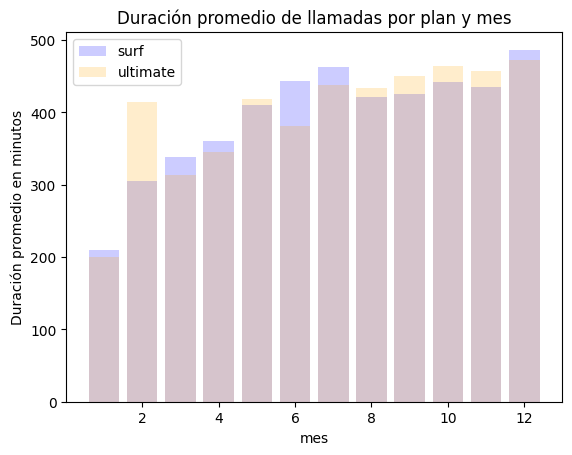

In [52]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

llamadas_promedio = df_merge_datos_1.groupby(['plan','mes']).agg({'total_dura':'mean'}).round(2).reset_index()

surf= llamadas_promedio[llamadas_promedio['plan']=='surf']
ultimate= llamadas_promedio[llamadas_promedio['plan']=='ultimate']

fig, ax = plt.subplots()

ax.bar(surf['mes'],surf['total_dura'],label='surf',color='blue',alpha=0.2)
ax.bar(ultimate['mes'],ultimate['total_dura'],label='ultimate',color='orange',alpha=0.2)

ax.set_xlabel('mes')
ax.set_ylabel('Duración promedio en minutos')
ax.set_title('Duración promedio de llamadas por plan y mes')
ax.legend()
plt.show()



      mes  total_dura
1       8       187.0
2       9       326.0
3      10       411.0
4      11       441.0
5      12       422.0
...   ...         ...
2282   12         0.0
2286   10         0.0
2287   11         0.0
2288   12         0.0
2289    5         0.0

[1573 rows x 2 columns]


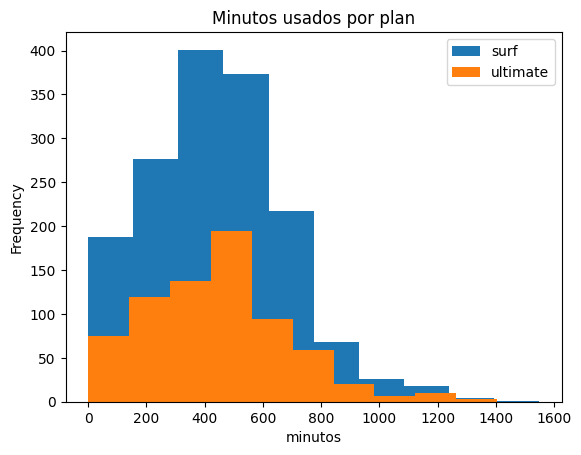

In [53]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_min= df_merge_datos_1[df_merge_datos_1['plan']=='surf'][['mes','total_dura']]
ultimate_min= df_merge_datos_1[df_merge_datos_1['plan']=='ultimate'][['mes','total_dura']]

print(surf_min)

surf_min['total_dura'].plot(kind='hist', label='surf')
ultimate_min['total_dura'].plot(kind='hist',label='ultimate')
plt.title('Minutos usados por plan')
plt.xlabel('minutos')
plt.legend()
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [54]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf_media_call = surf_min['total_dura'].mean().round(2)
ultimate_media_call = ultimate_min['total_dura'].mean().round(2)

surf_median_call = surf_min['total_dura'].median().round(2)
ultimate_median_call = ultimate_min['total_dura'].median().round(2)

varianza_surf = np.var(surf_min['total_dura'])
varianza_ultimate = np.var(ultimate_min['total_dura'])
print('Medias')
print(f'media plan surf: {surf_media_call}')
print(f'media plan ultimate: {ultimate_media_call}')
print('Medianas')
print(f'mediana plan surf: {surf_median_call}')
print(f'mediana plan ultimate: {ultimate_median_call}')
print('Varianzas')
print(f'varianza plan surf: {varianza_surf}')
print(f'varianza plan ultimate: {varianza_ultimate}')

Medias
media plan surf: 440.32
media plan ultimate: 442.43
Medianas
mediana plan surf: 438.0
mediana plan ultimate: 437.5
Varianzas
varianza plan surf: 57707.03664791546
varianza plan ultimate: 60791.46203510802


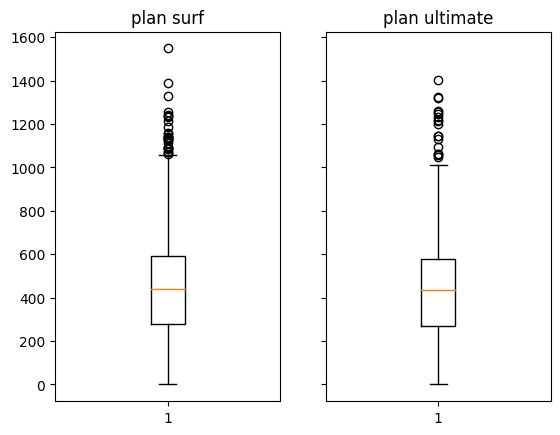

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


fig, axes= plt.subplots(1,2, sharey=True)

axes[0].boxplot( x='total_dura', data=surf_min)
axes[0].set_title('plan surf')

axes[1].boxplot( x='total_dura', data=ultimate_min)
axes[1].set_title('plan ultimate')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

-La media para los 2 planes son parecidas el plan surf tiene una media aproximada de 404.76 y el plan ultimate 406.19 esto indica que consumen casi los mismos minutos por llama mensualmente pero las personas del plan ultimate tienden a usar mas minutos.

-La mediana como se puede apreciar son casi iguales para el plan surf es 401.76 aproximadamente y para el plan ultimate 398.58 por lo que el promedio de personas que hablan 400 o mas mayo a las personas que hablan menos de 400 minutos

-La varianza es mucho mayor a la media en ambos casos por lo que los datos estan mayormente dispersos de esta siendo mayor la varianza del plan ultimate por lo que se puede concluir que tiene una mayor cantidad de minutos mayor a la media 



### Mensajes

      mes  cant_messa
155     1           0
1642    1          21
1208    2          11
2243    2           0
455     2           3
...   ...         ...
1904   12          30
1896   12           0
324    12          17
93     12          13
319    12           0

[1573 rows x 2 columns]


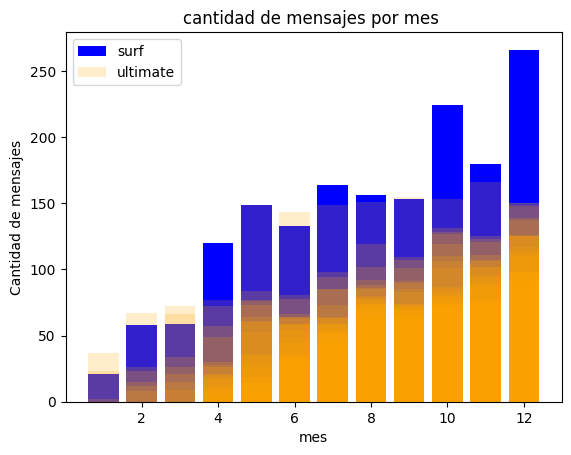

In [55]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_messages= df_merge_datos_1[df_merge_datos_1['plan']=='surf'][['mes','cant_messa']].sort_values(by='mes')
ultimate_messages= df_merge_datos_1[df_merge_datos_1['plan']=='ultimate'][['mes','cant_messa']].sort_values(by='mes')

print(surf_messages)
fig, axm = plt.subplots()

axm.bar(surf_messages['mes'],surf_messages['cant_messa'], color='blue', label='surf')
axm.bar(ultimate_messages['mes'],ultimate_messages['cant_messa'],color='orange',label='ultimate',alpha=0.2)

axm.set_xlabel('mes')
axm.set_ylabel('Cantidad de mensajes')
axm.set_title('cantidad de mensajes por mes ')
axm.legend()
plt.show()


In [57]:
surf_media_messages = surf_messages['cant_messa'].mean().round(2)
ultimate_media_messages = ultimate_messages['cant_messa'].mean().round(2)

surf_median_messages = surf_messages['cant_messa'].median().round(2)
ultimate_median_messages = ultimate_messages['cant_messa'].median().round(2)

varianza_surf_messages = np.var(surf_messages['cant_messa'])
varianza_ultimate_messages = np.var(ultimate_messages['cant_messa'])
print('Medias')
print(f'media plan surf: {surf_media_messages}')
print(f'media plan ultimate: {ultimate_media_messages }')
print('Medianas')
print(f'mediana plan surf: {surf_median_messages}')
print(f'mediana plan ultimate: {ultimate_median_messages}')
print('Varianzas')
print(f'varianza plan surf: {varianza_surf_messages}')
print(f'varianza plan ultimate: {varianza_ultimate_messages}')



Medias
media plan surf: 31.16
media plan ultimate: 37.55
Medianas
mediana plan surf: 24.0
mediana plan ultimate: 30.0
Varianzas
varianza plan surf: 1126.008231726662
varianza plan ultimate: 1207.0779147376545


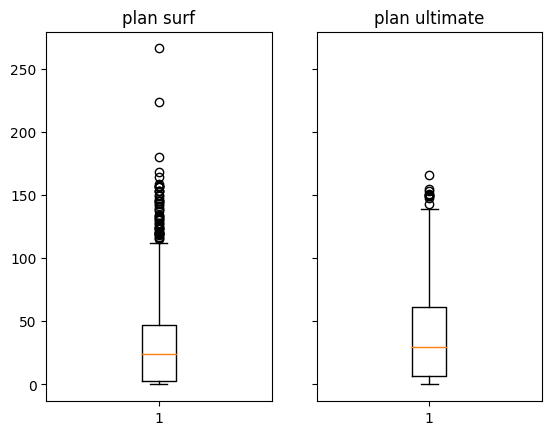

In [43]:
fig, axesm= plt.subplots(1,2, sharey=True)

axesm[0].boxplot( x='cant_messa', data=surf_messages)
axesm[0].set_title('plan surf')

axesm[1].boxplot( x='cant_messa', data=ultimate_messages)
axesm[1].set_title('plan ultimate')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

-La media del plan ultimate es mayor con 38 mensajes promedio a comparacion de la del plan surf que son de 31 mensajes esto quiere decir la las personas del plan ultimate tienden a mandar una mayor cantidad de mensajes

-La mediana para el plan ultimate es de 30 y para surf de 24 al ser mayor la media que la mediana tienen una asimetria positiva en ambos planes

-La varianza es mayor a la media en ambos planes por lo que los datos estan dispersos de esta. Como se puede apreciar el grafico las personas del plan ultimate tienden a enviar mas mensajes 

-Varia muy poco la cantidad de mensajes  entre los 2 planes

### Internet

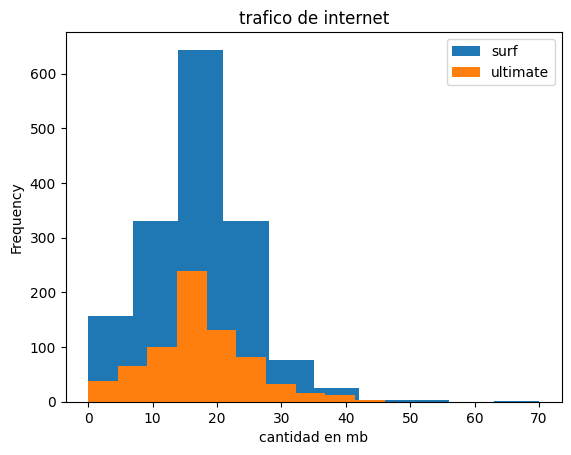

In [58]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_internet= df_merge_datos_1[df_merge_datos_1['plan']=='surf'][['user_id','mes','cant_trafic']].sort_values(by='mes')
ultimate_internet= df_merge_datos_1[df_merge_datos_1['plan']=='ultimate'][['user_id','mes','cant_trafic']].sort_values(by='mes')

surf_internet['cant_trafic'].plot(kind='hist', label='surf')
ultimate_internet['cant_trafic'].plot(kind='hist',label='ultimate')
plt.title('trafico de internet')
plt.xlabel('cantidad en mb')
plt.legend()
plt.show()



In [45]:
surf_media_internet = surf_internet['cant_trafic'].mean().round(2)
ultimate_media_internet = ultimate_internet['cant_trafic'].mean().round(2)

surf_median_internet = surf_internet['cant_trafic'].median().round(2)
ultimate_median_internet = ultimate_internet['cant_trafic'].median().round(2)

varianza_surf_internet = np.var(surf_internet['cant_trafic'])
varianza_ultimate_internet = np.var(ultimate_internet['cant_trafic'])
print('Medias')
print(f'media plan surf: {surf_media_internet}')
print(f'media plan ultimate: {ultimate_media_internet}')
print('Medianas')
print(f'mediana plan surf: {surf_median_internet}')
print(f'mediana plan ultimate: {ultimate_median_internet}')
print('Varianzas')
print(f'varianza plan surf: {varianza_surf_internet}')
print(f'varianza plan ultimate: {varianza_ultimate_internet}')



Medias
media plan surf: 16.67
media plan ultimate: 17.31
Medianas
mediana plan surf: 17.0
mediana plan ultimate: 17.0
Varianzas
varianza plan surf: 61.54444942447022
varianza plan ultimate: 58.748840663580246


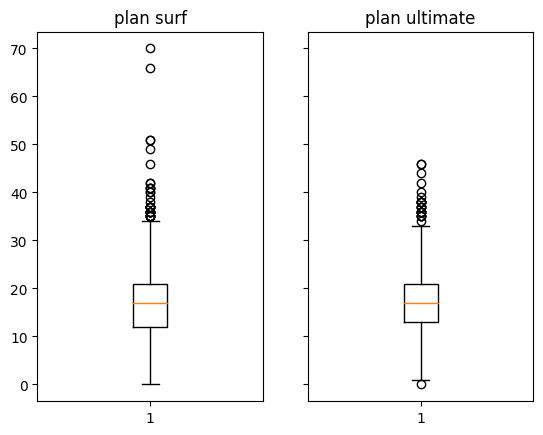

In [59]:
fig, axesn= plt.subplots(1,2, sharey=True)

axesn[0].boxplot( x='cant_trafic', data=surf_internet)
axesn[0].set_title('plan surf')

axesn[1].boxplot( x='cant_trafic', data=ultimate_internet)
axesn[1].set_title('plan ultimate')
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

-La media como se ha estado repitiendo es mayor para el plan ultimate 

-En este caso la mediana es casi edentica entre los 2 planes

-La varianza es mayor a la media en los planes, el plan surf tiene una varianza mayor lo que quiere decir que cuenta con datos mas dispersos

-Varia muy poco el consumo que tiene entre los 2 planes

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

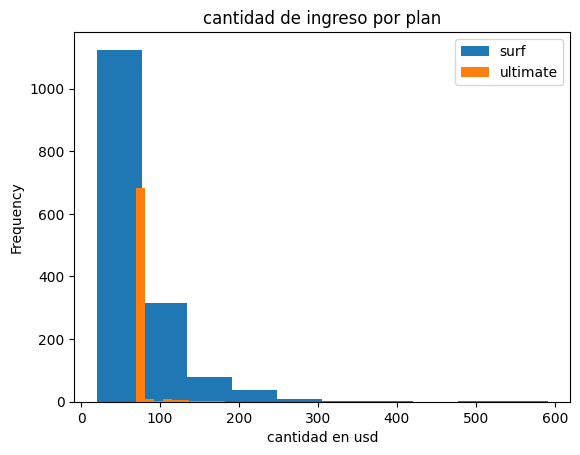

     user_id  mes  ingreso_men
915     1196    3         77.0
1123    1246    3         77.0
94      1028    3        112.0
95      1028    4        119.0
864     1185    4         84.0
96      1028    5         91.0
2083    1460    6         91.0
97      1028    6        126.0
98      1028    7        126.0
662     1144    7        126.0
99      1028    8        140.0
663     1144    8        112.0
2204    1490    8        133.0
582     1126    8         98.0
664     1144    9        119.0
2205    1490    9        112.0
170     1043    9         84.0
2086    1460    9        105.0
1847    1403    9        105.0
101     1028   10        182.0
1700    1373   10         84.0
1848    1403   10         77.0
171     1043   10         77.0
665     1144   10        126.0
2206    1490   10        119.0
1990    1435   11         91.0
102     1028   11        154.0
135     1038   11        126.0
248     1057   11        105.0
172     1043   11         91.0
173     1043   12        126.0
667     

In [60]:
surf_ingreso= df_merge_datos_1[df_merge_datos_1['plan']=='surf'][['user_id','mes','ingreso_men']].sort_values(by='mes')
ultimate_ingreso = df_merge_datos_1[df_merge_datos_1['plan']=='ultimate'][['user_id','mes','ingreso_men']].sort_values(by='mes')

surf_ingreso['ingreso_men'].plot(kind='hist', label='surf')
ultimate_ingreso['ingreso_men'].plot(kind='hist',label='ultimate')
plt.title('cantidad de ingreso por plan')
plt.xlabel('cantidad en usd')
plt.legend()
plt.show()




In [61]:
surf_media_ingreso= surf_ingreso['ingreso_men'].mean().round(2)
ultimate_media_ingreso = ultimate_ingreso['ingreso_men'].mean().round(2)

surf_median_ingreso = surf_ingreso['ingreso_men'].median().round(2)
ultimate_median_ingreso = ultimate_ingreso['ingreso_men'].median().round(2)

varianza_surf_ingreso = np.var(surf_ingreso['ingreso_men'])
varianza_ultimate_ingreso = np.var(ultimate_ingreso['ingreso_men'])
print('Medias')
print(f'media plan surf: {surf_media_ingreso}')
print(f'media plan ultimate: {ultimate_media_ingreso}')
print('Medianas')
print(f'mediana plan surf: {surf_median_ingreso}')
print(f'mediana plan ultimate: {ultimate_median_ingreso}')
print('Varianzas')
print(f'varianza plan surf: {varianza_surf_ingreso}')
print(f'varianza plan ultimate: {varianza_ultimate_ingreso}')


Medias
media plan surf: 60.9
media plan ultimate: 72.31
Medianas
mediana plan surf: 40.42
mediana plan ultimate: 70.0
Varianzas
varianza plan surf: 3073.4128052693072
varianza plan ultimate: 129.66814043209877


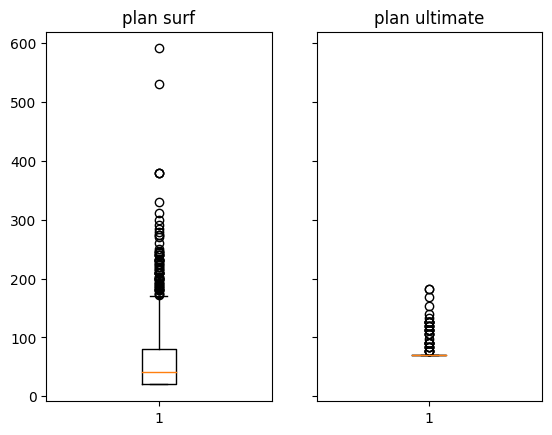

In [62]:
fig, axesi= plt.subplots(1,2, sharey=True)

axesi[0].boxplot( x='ingreso_men', data=surf_ingreso)
axesi[0].set_title('plan surf')

axesi[1].boxplot( x='ingreso_men', data=ultimate_ingreso)
axesi[1].set_title('plan ultimate')
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

-La media difiere bastante en comparacion con los datos de los minutos, mensajes e internet ya que la media del plan surf es mucho mayor que la del plan ultimate esto quiere decir que las personas tienden a pagar mas en el plan surf mensualmente

-En ambos casos la media es superior a la mediana como se venia analisando con demas datos pero la diferencia entre los planes es bastante grande 

-La varianza es mucho mayor a la media en ambos casos por lo que los datos estan dispersos de esta, pero la varianza del plan surf es mucho mayor lo que indica que tiene una mayor dipersion en comparacion que el plan ultimate 

-Con esto podemos ver que las personas del plan surf pagan mas mensualmente, teniendo en conisderacion las caracteristicas de cada plan y la cantidad de personas que tienen, por lo que se podria argumentar que las personas del plan surf sobrepasan ya sea los minutos, cantidad de mensajes o internet llevando a pagar por exceder estos y las personas del ultimate tienden a no pasar el limite del plan haciendo que estos solo paguen la mensualidad y no los excedentes

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [66]:
# Prueba las hipótesis
surf_ingreso_h= df_merge_datos_1[df_merge_datos_1['plan']=='surf'][['user_id','ingreso_men']]
ultimate_ingreso_h = df_merge_datos_1[df_merge_datos_1['plan']=='ultimate'][['user_id','ingreso_men']]


alpha = 0.05

results = st.ttest_ind(surf_ingreso_h['ingreso_men'],ultimate_ingreso_h['ingreso_men'], equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')
    
print()    
results_equal_var = st.ttest_ind(surf_ingreso_h['ingreso_men'],ultimate_ingreso_h['ingreso_men'])

print('valor p: ', results_equal_var.pvalue)

if results_equal_var.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

valor p:  9.430219968963033e-15
Rechazamos la hipotesis nula

valor p:  4.9915442243501295e-08
Rechazamos la hipotesis nula


- La hipótesis nula se rechazo por lo cual los ingreses de los usuarios ultimate y surf son diferents

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [65]:
# Prueba las hipótesis
df_ingreso_para_area = df_merge_datos_1[['user_id','ingreso_men']]
df_area = df_users[['user_id','state']]
df_ingreso_area = df_ingreso_para_area.merge(df_area, on='user_id', how='left')

filtro_nj= df_ingreso_area[df_ingreso_area['state'].str.startswith('NY NJ')]
filtro_no_nj =df_ingreso_area[~(df_ingreso_area['state'].str.startswith('NY NJ'))]

alpha = 0.05

results_area = st.ttest_ind(filtro_nj['ingreso_men'],filtro_no_nj['ingreso_men'], equal_var=False)

print('valor p: ', results_area .pvalue)

if results_area.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')
    
print()    
results_equal_var_area = st.ttest_ind(filtro_nj['ingreso_men'],filtro_no_nj['ingreso_men'])

print('valor p: ', results_equal_var_area.pvalue)

if results_equal_var_area.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')


valor p:  0.034754837582215314
Rechazamos la hipotesis nula

valor p:  0.045081764209720945
Rechazamos la hipotesis nula


- La hipótesis nula se rechazo lo que quiere decir que el ingreso promedio de los usuarioa de las regiones NY-NJ difieren de las demas

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

-Con respecto a las medias analizadas la mayor siempre fue con respecto al plan ultimate pero se tiene que considerar que las personas del plan surf eran practicamente el doble que las del ultimate 

-se puede ver que las personas del plan ultimate no usan la totalidad de los recursos que posee el plan 

-Por lo contrario las personas del plan surf tienden a sobrepasar los limites del plan 

-Al redondear las llamadas como era requerido se encontraron llamadas con duracion 0 lo cual se remplazo con duracion de 1 ya que independientemente si fue error del sistema o una llamada que se corto al momento de marcar por el usuario se tiene un registro de esta

-Ya que la primera hipotesis con respecto a la media de ingresos de los 2 planes se rechazo la hipotesis nula lo que significa que los ingresos son diferentes

-Con respecto a la segunda hipotesis de media de ingreso en el NY-NJ se rechaza la hipostisis nula lo que significa que los ingresos son diferentes para el area NY-NJ con lo demas
